In [1]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [73]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
import time

# Reflect Tables into SQLAlchemy ORM

In [16]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [8]:
# create engine to hawaii.sqlite - ensure hawaii.sqlite is already in place (in the same folder level as this file), or a new, blank file will be created
engine = create_engine("sqlite:///hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [18]:
# Create inspector to get a list of column names and types for the two tables
inspector = inspect(engine)

In [19]:
# Column names and types for "Station"
Station_cols = inspector.get_columns('station')

for c in Station_cols:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [20]:
# Column names and types for "Measurement"
Measurement_cols = inspector.get_columns('measurement')

for c in Measurement_cols:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [91]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date

print(f" The most recent date in the dataset is {last_date}.")

 The most recent date in the dataset is 2017-08-23.


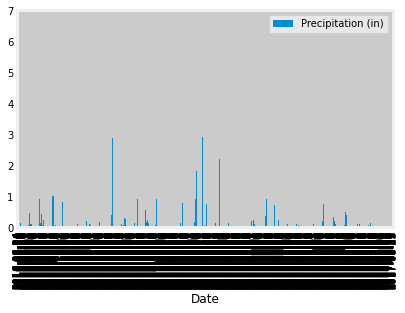

In [88]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one non leap-year from the last date in data set. strptime converts a string to datetime. strftime converts datetime to string
date_format = "%Y-%m-%d"
query_date = dt.datetime.strptime(last_date, date_format) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
date_and_prcp = session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date > query_date).all()

# Save the query results (a list) as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(date_and_prcp, columns=["Date", "Precipitation (in)"])
prcp_df = prcp_df.set_index("Date")

# Sort the dataframe by date
prcp_df = prcp_df.sort_index(ascending = True)

# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot.bar();

In [90]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_stats = prcp_df[["Precipitation (in)"]].describe()
prcp_stats

,Precipitation (in)
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()